In [186]:
import csv
import json
from math import e
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
import numpy as np
import pandas as pd
import pickle as pkl
import random

In [141]:
with open("brown_cn_new.pkl", "rb") as infile:
    cn_gold = pkl.load(infile)

In [142]:
def get_gold_wn(w):
    gold = []
    for syn in wordnet.synsets(w) :
        for l in syn.lemmas() :
            gold.append(l.name())
    gold = set(gold)
    gold.add(w)
    return gold

In [237]:
glove = {}
with open("../glove.twitter.27B/glove.twitter.27B.50d.txt") as infile:
    for line in infile:
        l = line.split()
        glove[l[0]] = np.asarray(l[1:], dtype="float32")

In [4]:
smile_wn = get_gold_wn("sword")
smile_cn = cn_gold_new['sword']
both = smile_wn.intersection(smile_cn)
s_wn = smile_wn - smile_cn
s_cn = smile_cn - smile_wn

NameError: name 'cn_gold_new' is not defined

In [42]:
sent = ""
for w in s_cn:
    sent += w + ", "
sent

'tuck, swordbearing, swordplay, buckler, scramasax, sheath, coulisse, toadsticker, rapper, bastard, badelaire, matachin, swordswomanship, langet, fencing, dah, menuki, allonge, suit, swordcraft, swordmaker, accollé, scimitar, swordfighter, odachi, sabre, caveating, estramacon, warrior, shinai, kopis, kissaki, dagger, gatka, card, swords, kris, swordster, xiphoid, braquemard, shabble, iaido, xiphophyllous, slice, stramazoun, knifeplay, ensiferous, espadon, unsworded, schiavona, machete, shield, zweihänder, swordsman, rapier, falchion, khopesh, curtana, hilt, forte, ricasso, broadsword, brandiron, kirpan, furbisher, pommel, toledo, whinyard, chape, epee, swordsmith, heraldry, degen, gladial, sharp, falx, edge, belt, longsword, faena, macharomancy, swordmaking, urumi, shiny, ensate, sax, swordpoint, xiphos, uchigatana, lay, swordlike, kindjal, loom, makhaira, swordproof, fish, pell, cinquedea, pilcher, point, swordsmithing, swordfight, macana, brond, long, gladiate, morglay, backsword, me

In [26]:
sent = ""
for w in get_gold_wn("blue"):
    sent += w + ", "
sent

'profane, downhearted, aristocratical, patrician, dark, drab, racy, wild_blue_yonder, bluish, risque, dispirited, drear, amobarbital_sodium, blasphemous, naughty, dingy, blue_devil, low, grim, downcast, bluing, depressed, down_in_the_mouth, blueness, Amytal, gamy, blueish, blue_angel, blue_air, sorry, blueing, disconsolate, dismal, low-spirited, blue, puritanic, down, blue-blooded, aristocratic, spicy, gentle, blue_sky, gloomy, puritanical, dreary, juicy, gamey, '

In [25]:
sent = ""
for w in cn_gold_new['blue']:
    sent += w + ", "
sent

'profane, royal, blow, urocyanin, calypso, shibuichi, cyanometer, caesious, baby, zaffre, democratic, windows, associate, bluebell, bice, lazuline, bluish, flame, violet, magenta, violets, velvet, shiver, green, vishnu, sad, bluewash, rhapsody, hues, aqua, nonblue, roller, bluey, red, ultramarine, watchet, pyocyanic, azureous, robins, colour, ozone, rare, moo, pearly, literary, factory, sky, bluefin, bluepoint, sadness, genipocyanin, pornographic, noble, blueing, ao, bluen, triad, salamstone, bluewards, white, flute, benitoite, melancholic, indicolite, skies, fifth, acyanopia, unblue, flag, quark, shade, blueward, colors, bluestocking, lycaenidae, azure, dihydroethidium, larkspur, dungaree, cupredoxin, dark, shock, smoke, gray, before, boy, main, plan, threw, other, orchid, bluestockinged, and, tristimulus, crayons, cross, teal, boys, butterfly, ravenclaw, blueberried, bluing, cloud, bluefaced, stilton, cyanosis, first, observation, smurfy, purple, yellow, blueberries, azuline, bluenes

In [65]:
arr1 = arr2 = [1, 2, 3]
np.mean([arr1, arr2], axis=0)

array([1., 2., 3.])

In [120]:
with open("kmeans_clusters_cn_glove_1.pkl", "rb") as infile:
    kmeans_clusters_cn = pkl.load(infile)

In [7]:
words = []
words_idx = []
clusters = []
for cluster_idx in kmeans_clusters_cn :
    precision_wn, recall_wn, precision_cn, recall_cn = [], [], [], []
    cluster = kmeans_clusters_cn[cluster_idx]
    for word in cluster :
        gold_wn = get_gold_wn(word)
        gold_cn = cn_gold[word]
        gold_cn.add(word)
        
        true_positive_wn = len(cluster.intersection(gold_wn))
        false_positive_wn = len(cluster - gold_wn)
        false_negative_wn = len(gold_wn - cluster)
        p_wn = true_positive_wn / (true_positive_wn + false_positive_wn)
        r_wn = true_positive_wn / (true_positive_wn + false_negative_wn)
        precision_wn.append(p_wn)
        recall_wn.append(r_wn)
        
        
        true_positive_cn = len(cluster.intersection(gold_cn))
        false_positive_cn = len(cluster - gold_cn)
        false_negative_cn = len(gold_cn - cluster)
        p_cn = true_positive_cn / (true_positive_cn + false_positive_cn)
        r_cn = true_positive_cn / (true_positive_cn + false_negative_cn)
        precision_cn.append(p_cn)
        recall_cn.append(r_cn)
        
        words_idx.append(word)
        words.append({"precision_wn" : p_wn, "recall_wn" : r_wn, "precision_cn" : p_cn, "recall_cn" : r_cn})
        
    clusters.append({"precision_wn" : np.mean(precision_wn),
                     "recall_wn" : np.mean(recall_wn),
                     "precision_cn" : np.mean(precision_cn),
                     "recall_cn" : np.mean(recall_cn)})

In [8]:
df_words = pd.DataFrame(words, index=words_idx)
df_clusters = pd.DataFrame(clusters)

In [9]:
df_words.to_csv("kmeans_glove_brown_words.csv")
df_clusters.to_csv("kmeans_glove_brown_clusters.csv")

In [30]:
clusters = []
indices = []
idx = 0
for cluster_idx in kmeans_clusters_cn:
    cluster = kmeans_clusters_cn[cluster_idx]
    if len(cluster) > 2 :
        clusters.append(" ".join(cluster))
        indices.append(idx)
    idx += 1

In [39]:
data = {"index" : indices, "words" : clusters}
df_kmeans_clusters = pd.DataFrame(data)

In [41]:
df_kmeans_clusters.to_csv("../mturk/sample.csv", index=False)

In [6]:
df_words.loc['camera']

NameError: name 'df_words' is not defined

In [61]:
kmeans_clusters_cn[6] - get_gold_wn('apple')

{'blackberry',
 'camera',
 'flash',
 'led',
 'messenger',
 'notebook',
 'opera',
 'telephone',
 'windows'}

In [24]:
get_gold_wn("blackberry")

{'blackberry', 'blackberry_bush'}

In [33]:
camera = cn_gold['camera'].add('camera')

In [35]:
kmeans_clusters_cn[6].intersection(cn_gold['camera'])

{'camera', 'flash'}

In [59]:
len(kmeans_clusters_cn[6] - cn_gold['camera'])

8

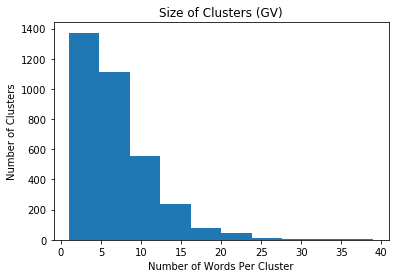

In [267]:
with open("../data/kmeans_clusters_gv_0.pkl", "rb") as infile:
    cluster_file = pkl.load(infile)
    
lens = []
sizes = []
clusters = []
for cluster in cluster_file:
    lens.append((len(cluster_file[cluster]), cluster))
    sizes.append(len(cluster_file[cluster]))
    clusters.append(cluster)
    
plt.hist(sizes)
plt.title("Size of Clusters (GV)")
plt.xlabel("Number of Words Per Cluster")
plt.ylabel("Number of Clusters")
# plt.show()
plt.savefig("kmeans_glove_gv_hist.png")

In [130]:
lens = []
sizes = []
clusters = []
for cluster in kmeans_clusters_cn:
    lens.append((len(kmeans_clusters_cn[cluster]), cluster))
    sizes.append(len(kmeans_clusters_cn[cluster]))
    clusters.append(cluster)

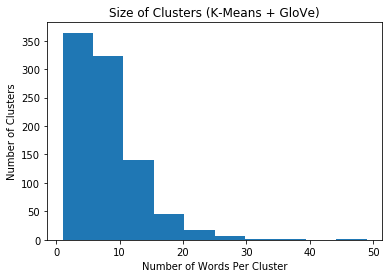

In [131]:
plt.hist(sizes)
plt.title("Size of Clusters (K-Means + GloVe)")
plt.xlabel("Number of Words Per Cluster")
plt.ylabel("Number of Clusters")
# plt.show()
plt.savefig("kmeans_glove_brown_hist.png")

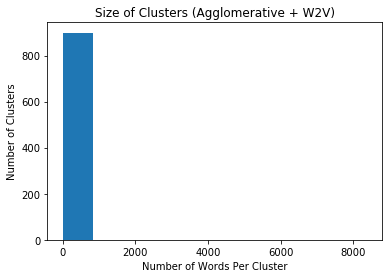

In [139]:
with open("agglom_clusters_w2v_cn_5.pkl", "rb") as infile:
    agglom = pkl.load(infile)

lens = []
sizes = []
clusters = []
for cluster in agglom:
    lens.append((len(agglom[cluster]), cluster))
    sizes.append(len(agglom[cluster]))
    clusters.append(cluster)

plt.hist(sizes)
plt.title("Size of Clusters (Agglomerative + W2V)")
plt.xlabel("Number of Words Per Cluster")
plt.ylabel("Number of Clusters")
# plt.show()
plt.savefig("agglom_w2v_brown_hist.png")

In [9]:
with open("kmeans_clusters_cn_glove_1.pkl", "rb") as infile:
    clusters = pkl.load(infile)

In [11]:
sample_clusters = {}
for cluster in clusters:
    if len(clusters[cluster]) > 2:
        sample_clusters[cluster] = clusters[cluster]

In [14]:
with open("brown_glove_clusters_sample.pkl", "wb") as outfile:
    pkl.dump(sample_clusters, outfile)

In [16]:
with open("brown_glove_clusters_sample.pkl", "rb") as infile:
    sample_clusters = pkl.load(infile)

In [17]:
samples = random.sample(sample_clusters.keys(), 300)

In [18]:
sample1, sample2, sample3 = {}, {}, {}
for x in range(100):
    sample1[samples[x]] = sample_clusters[samples[x]]
for x in range(100, 200):
    sample2[samples[x]] = sample_clusters[samples[x]]
for x in range(200, 300):
    sample3[samples[x]] = sample_clusters[samples[x]]

In [21]:
sample1

{780: {'culprits',
  'detectives',
  'gangs',
  'murderers',
  'picket',
  'scandals',
  'tragedies',
  'witness',
  'witnesses'},
 3: {'hospital', 'port', 'terminal'},
 850: {'anchor',
  'buckle',
  'cuff',
  'cuffs',
  'knife',
  'knot',
  'knuckle',
  'ladder',
  'leash',
  'plank',
  'roller',
  'rope',
  'skates',
  'sock',
  'tail'},
 191: {'colleagues', 'member', 'members', 'staff', 'veterans', 'volunteers'},
 888: {'cleft',
  'connoisseur',
  'corkscrew',
  'decorator',
  'pail',
  'parlor',
  'sealing',
  'stamping',
  'wrapper'},
 495: {'arm', 'cross', 'door', 'hand', 'hole', 'lift', 'ring'},
 311: {'avoided',
  'backed',
  'blamed',
  'claimed',
  'claiming',
  'deliberately',
  'informed',
  'recall',
  'refused',
  'spies',
  'threatening',
  'warn',
  'warned'},
 658: {'bounced', 'flopped', 'slid', 'sped', 'swerved', 'swung', 'ticked'},
 376: {'below',
  'bottom',
  'broad',
  'flat',
  'height',
  'inches',
  'length',
  'upper'},
 294: {'blood',
  'brain',
  'deep',
  '

In [22]:
with open("../mturk/batch1.csv", "w") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['index', 'words'])
    
    for cluster in sample1:
        c = " ".join(sample1[cluster])
        writer.writerow([cluster, c])
        
with open("../mturk/batch2.csv", "w") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['index', 'words'])
    
    for cluster in sample2:
        c = " ".join(sample2[cluster])
        writer.writerow([cluster, c])
        
with open("../mturk/batch3.csv", "w") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['index', 'words'])
    
    for cluster in sample3:
        c = " ".join(sample3[cluster])
        writer.writerow([cluster, c])

In [17]:
pilot_clusters = {}
for sample in random.sample(sample_clusters.keys(), 20):
    pilot_clusters[sample] = clusters[sample]

In [23]:
with open("../mturk/pilot_clusters.csv", "w") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(["index", "words"])
    
    for cluster in pilot_clusters:
        c = " ".join(pilot_clusters[cluster])
        writer.writerow([cluster, c])

In [5]:
with open('/Users/alyssahwang/Downloads/Batch_277895_batch_results.csv', 'r') as infile:
    results = pd.read_csv(infile)

In [6]:
results

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,WorkTimeInSeconds,LifetimeApprovalRate,Last30DaysApprovalRate,Last7DaysApprovalRate,Input.index,Input.words,Answer.clusters,Answer.num_clusters,Approve,Reject
0,38VTL6WC4A030TJKRXI08MGNE7Q5YG,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a list of words and asked to...,"cluster, english, words, similarity, semantics",$0.00,Mon May 04 13:05:32 PDT 2020,3,BatchId:277895;OriginalHitTemplateId:921587257;,3600,...,217,0% (0/0),0% (0/0),0% (0/0),317,gross creep jerk silly funny darn goddamn damm...,creep jerk darn goddamn dammit fucken\nsilly f...,2,NaN,NaN
1,38VTL6WC4A030TJKRXI08MGNE7Q5YG,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a list of words and asked to...,"cluster, english, words, similarity, semantics",$0.00,Mon May 04 13:05:32 PDT 2020,3,BatchId:277895;OriginalHitTemplateId:921587257;,3600,...,28,0% (0/0),0% (0/0),0% (0/0),317,gross creep jerk silly funny darn goddamn damm...,gross creep jerk darn goddamn dammit dumb spoi...,2,NaN,NaN
2,38VTL6WC4A030TJKRXI08MGNE7Q5YG,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a list of words and asked to...,"cluster, english, words, similarity, semantics",$0.00,Mon May 04 13:05:32 PDT 2020,3,BatchId:277895;OriginalHitTemplateId:921587257;,3600,...,35,0% (0/0),0% (0/0),0% (0/0),317,gross creep jerk silly funny darn goddamn damm...,gross creep jerk dumb spoiled weird ugly stupi...,3,NaN,NaN
3,3GKAWYFRAPG4VS6CFG40T7B3NJLDP2,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a list of words and asked to...,"cluster, english, words, similarity, semantics",$0.00,Mon May 04 13:05:32 PDT 2020,3,BatchId:277895;OriginalHitTemplateId:921587257;,3600,...,26,0% (0/0),0% (0/0),0% (0/0),420,kissed screamed touched shouted pointed giggle...,kissed screamed touched shouted pointed giggle...,1,NaN,NaN
4,3GKAWYFRAPG4VS6CFG40T7B3NJLDP2,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a list of words and asked to...,"cluster, english, words, similarity, semantics",$0.00,Mon May 04 13:05:32 PDT 2020,3,BatchId:277895;OriginalHitTemplateId:921587257;,3600,...,95,0% (0/0),0% (0/0),0% (0/0),420,kissed screamed touched shouted pointed giggle...,kissed touched shook \npointed stared waved sm...,3,NaN,NaN
5,3GKAWYFRAPG4VS6CFG40T7B3NJLDP2,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a list of words and asked to...,"cluster, english, words, similarity, semantics",$0.00,Mon May 04 13:05:32 PDT 2020,3,BatchId:277895;OriginalHitTemplateId:921587257;,3600,...,152,0% (0/0),0% (0/0),0% (0/0),420,kissed screamed touched shouted pointed giggle...,screamed shouted giggled whispered cheered gre...,2,NaN,NaN
6,3OEWW2KGQJYMASUB0GRL476DDEPDOL,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a list of words and asked to...,"cluster, english, words, similarity, semantics",$0.00,Mon May 04 13:05:32 PDT 2020,3,BatchId:277895;OriginalHitTemplateId:921587257;,3600,...,210,0% (0/0),0% (0/0),0% (0/0),738,selfishness indignation contempt distaste dism...,selfishness modesty \nindignation contrition \...,6,NaN,NaN
7,3OEWW2KGQJYMASUB0GRL476DDEPDOL,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a list of words and asked to...,"cluster, english, words, similarity, semantics",$0.00,Mon May 04 13:05:32 PDT 2020,3,BatchId:277895;OriginalHitTemplateId:921587257;,3600,...,61,0% (0/0),0% (0/0),0% (0/0),738,selfishness indignation contempt distaste dism...,contempt distaste indignation dismay\ncontriti...,5,NaN,NaN
8,3OEWW2KGQJYMASUB0GRL476DDEPDOL,310QDH87LDM3M5YEQMKPIGB7TOUQR9,Create clusters of semantically similar words,You will be given a l

In [12]:
results1 = results.groupby(['Input.index', 'Input.words'], as_index=False)['Answer.num_clusters'].mean()

In [14]:
results1

,Input.index,Input.words,Answer.num_clusters
0,54,drama movies bachelor gossip,1.666667
1,69,blushing touching pose kissing,2.333333
2,212,haste hum hath bade mere mast,4.666667
3,234,mice chickens bees cows mosquitoes turkeys,1.666667
4,273,eat cooking cook eating food dishes,1.000000
5,294,minds heart blood thoughts brain deep soul lif...,1.666667
6,317,gross creep jerk silly funny darn goddamn damm...,2.333333
7,353,unimpressed fascinated amused outraged frighte...,3.333333
8,413,tales puzzle survival journey tale suspense ma...,4.000000
9,420,kissed screamed touched shouted pointed giggle...,2.000000


In [15]:
results1['Answer.num_clusters'].mean()

2.7666666666666666

In [3]:
with open("kmeans_clusters_gv_0.pkl", "rb") as infile:
    clusters = pkl.load(infile)

In [4]:
clusters

{0: {'dms', 'msg', 'msgs'},
 1: {'porno'},
 2: {'cel', 'fone'},
 3: {'belo',
  'com',
  'logo',
  'monte',
  'num',
  'os',
  'ou',
  'outro',
  'pro',
  'tens',
  'um'},
 4: {'app',
  'etc',
  'facebook',
  'google',
  'instagram',
  'internet',
  'mail',
  'twitter',
  'whatsapp',
  'wifi'},
 5: {'+'},
 6: {'chat', 'dm', 'fb', 'inbox', 'insta', 'offline', 'skype'},
 7: {'wilt'},
 8: {'ils', 'ont', 'qui', 'sont'},
 9: {'amg',
  'diz',
  'eles',
  'gata',
  'gostei',
  'nem',
  'nessa',
  'nova',
  'sim',
  'tempo',
  'uma',
  'vc',
  'á',
  'é',
  'ó'},
 10: {'ai'},
 11: {'da', 'do', 'e', 'em', 'moro', 'na', 'nas'},
 12: {'replies', 'texts', 'txts', 'unread', 'voicemail', 'voicemails'},
 13: {'stabilized'},
 14: {'aff',
  'ali',
  'alo',
  'bia',
  'bj',
  'cu',
  'dae',
  'dai',
  'faze',
  'irma',
  'ja',
  'kk',
  'mae',
  'mor',
  'ri',
  'rs',
  'sai'},
 15: {'tyrese'},
 16: {'contacts',
  'emails',
  'emojis',
  'imessage',
  'interactions',
  'loading',
  'messages',
  'notific

In [8]:
gv_words = pd.read_csv("../src/gv_words_gv_glove_0.csv")
gv_clusters = pd.read_csv("../src/gv_clustersgv_glove_0.csv")

In [9]:
gv_clusters

,Unnamed: 0,precision_wn,recall_wn,precision_cn,recall_cn
0,0,0.333333,0.277778,0.333333,1.0
1,1,1.000000,0.200000,1.000000,1.0
2,2,0.500000,1.000000,0.500000,1.0
3,3,0.090909,0.686147,0.090909,1.0
4,4,0.100000,0.645000,0.100000,1.0
...,...,...,...,...,...
3431,3431,1.000000,1.000000,1.000000,1.0
3432,3432,0.500000,0.200000,0.500000,1.0
3433,3433,1.000000,1.000000,1.000000,1.0
3434,3434,1.000000,1.000000,1.000000,1.0


In [239]:
brown_words = pd.read_csv("kmeans_glove_brown_words.csv")
# brown_clusters = pd.read_csv("kmeans_glove_brown_clusters.csv")

In [240]:
missing_glove = 0
for word in brown_words["Unnamed: 0"]:
    missing_glove += int(word not in glove)
missing_glove

0

In [154]:
brown_missing

,missing_glove,missing_cn,missing_wn
em,1,0,0
de,1,0,0
um,1,0,1
do,1,0,0
``,1,1,1
...,...,...,...
outrun,1,0,1
disarm,1,0,0
extinguish,1,0,0
defied,1,0,0


In [155]:
brown_missing.sum()

missing_glove    6922
missing_cn        146
missing_wn        549
dtype: int64

In [233]:
gv_words = pd.read_csv("../src/gv_words_gv_glove_0.csv")
# gv_clusters = pd.read_csv("../src/gv_clustersgv_glove_0.csv")

In [241]:
missing_glove = 0
for word in aae_words["Unnamed: 0"]:
    missing_glove += int(word not in glove)
missing_glove

0

In [242]:
len(glove)

1193514

In [243]:
for cols in ["precision_wn", "recall_wn", "precision_cn", "recall_cn"]:
    print(cols, aae_words[cols].mean(), aae_words[cols].std())

KeyError: 'precision_wn'

In [164]:
cn_gv = {}
with open("gv_cn_gold.txt", "r") as infile:
    next(infile)
    for line in infile:
        l = line.split('\t')
        cn_gv[l[0]] = json.loads(l[1])

In [167]:
gv_words

,Unnamed: 0,precision_wn,recall_wn,precision_cn,recall_cn,missing_from_cn,missing_from_wn
0,dms,0.333333,0.166667,0.333333,1.0,1,0
1,msgs,0.333333,0.333333,0.333333,1.0,1,0
2,msg,0.333333,0.333333,0.333333,1.0,1,0
3,porno,1.000000,0.200000,1.000000,1.0,1,0
4,fone,0.500000,1.000000,0.500000,1.0,1,1
...,...,...,...,...,...,...,...
22718,contender,0.500000,0.200000,0.500000,1.0,1,0
22719,nawll,1.000000,1.000000,1.000000,1.0,1,1
22720,holdon,1.000000,1.000000,1.000000,1.0,1,1
22721,byob,0.500000,1.000000,0.500000,1.0,1,1


In [169]:
word_idx = []
missing = []
for word in gv_words["Unnamed: 0"]:
    w = str(word)
    word_idx.append(w)
    missing_glove = int(w not in glove)
    try:
        missing_cn = int(len(cn_gv[w]) == 0)
    except:
        missing_cn = 1
    missing_wn = int(len(get_gold_wn(w)) == 1)
    
    missing.append({
        "missing_glove" : missing_glove,
        "missing_cn" : missing_cn,
        "missing_wn":  missing_wn
    })
    
gv_missing = pd.DataFrame(missing, index=word_idx)

In [170]:
gv_missing

,missing_glove,missing_cn,missing_wn
dms,1,0,0
msgs,1,0,0
msg,1,0,0
porno,1,0,0
fone,1,0,1
...,...,...,...
contender,1,0,0
nawll,1,1,1
holdon,1,1,1
byob,1,0,1


In [171]:
gv_missing.sum()

missing_glove    22723
missing_cn        8492
missing_wn        9884
dtype: int64

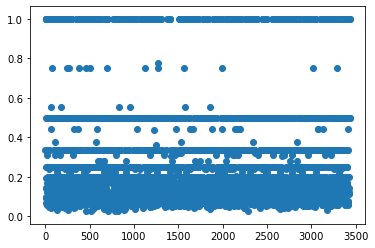

In [179]:
batch1 = pd.read_csv("../mturk/batch1_results.csv")
batch2 = pd.read_csv("../mturk/batch2_results.csv")
batch3 = pd.read_csv("../mturk/batch3_results.csv")
batches = pd.concat([batch1, batch2, batch3], axis=0)

In [180]:
batches = batches[["Input.index", "Input.words", "Answer.clusters", "Answer.num_clusters"]]

In [181]:
batches

,Input.index,Input.words,Answer.clusters,Answer.num_clusters
0,780,detectives tragedies witnesses murderers picke...,"detectives, tragedies, witnesses, murderers, c...",2
1,780,detectives tragedies witnesses murderers picke...,detectives tragedies witnesses murderers picke...,1
2,780,detectives tragedies witnesses murderers picke...,detectives tragedies witnesses murderers picke...,1
3,3,hospital port terminal,port terminal;\rhospital,2
4,3,hospital port terminal,hospital\rport terminal,2
...,...,...,...,...
296,141,missing least ago twice since lost months fail...,missing missed lost failed taken ended \rleast...,4
297,141,missing least ago twice since lost months fail...,time,"twice, once,"
298,289,soldiers tribal army navy supreme troops milit...,soldiers tribal army navy troops military patr...,3
299,289,soldiers tribal army navy supreme troops milit...,soldiers tribal army navy supreme troops milit...,1


In [183]:
def count_words(row):
    return len(row['Input.words'].split())

batches["size"] = batches.apply(lambda row: count_words(row), axis=1)

In [188]:
batches

,Input.index,Input.words,Answer.clusters,Answer.num_clusters,size
0,780,detectives tragedies witnesses murderers picke...,"detectives, tragedies, witnesses, murderers, c...",2,9
1,780,detectives tragedies witnesses murderers picke...,detectives tragedies witnesses murderers picke...,1,9
2,780,detectives tragedies witnesses murderers picke...,detectives tragedies witnesses murderers picke...,1,9
3,3,hospital port terminal,port terminal;\rhospital,2,3
4,3,hospital port terminal,hospital\rport terminal,2,3
...,...,...,...,...,...
295,141,missing least ago twice since lost months fail...,missing lost taken seen watched missed;\rleast...,4,22
296,141,missing least ago twice since lost months fail...,missing missed lost failed taken ended \rleast...,4,22
298,289,soldiers tribal army navy supreme troops milit...,soldiers tribal army navy troops military patr...,3,16
299,289,soldiers tribal army navy supreme troops milit...,soldiers tribal army navy supreme troops milit...,1,16


In [190]:
def score(row):
    frac = row["size"] / int(row["Answer.num_clusters"])
    return 1 / (1 + e ** -frac)

batches["score"] = batches.apply(lambda row: score(row), axis=1)

In [214]:
batches["Answer.num_clusters"] = pd.to_numeric(batches["Answer.num_clusters"])

In [215]:
batches_agg = batches.groupby(['Input.index', 'Input.words'])[['Answer.num_clusters', 'size']].mean()

In [217]:
batches_agg["score"] = batches_agg.apply(lambda row: score(row), axis=1)

In [282]:
batches_agg

,,Answer.num_clusters,size,score
Input.index,Input.words,,,
0,de um do em ``,1.000000,5.0,0.993307
3,hospital port terminal,2.000000,3.0,0.817574
9,real gay face short cool like girls old look boys crazy crack hot,6.333333,13.0,0.897216
11,petit petits et pour fond fille repose merveilleux corps alors genre oui tout chambre plus week-end lit,1.000000,17.0,1.000000
17,kindly shout instant account following limit hacked follow mention favorites followed thirsty,3.666667,12.0,0.982014
...,...,...,...,...
874,maniacal configurations premonition involuntary altercation,2.333333,5.0,0.924142
877,footsteps twenties overlook crosses tread paths barriers backward,3.000000,8.0,0.935031
888,sealing cleft decorator wrapper connoisseur pail parlor stamping corkscrew,3.000000,9.0,0.952574


In [221]:
merged = pd.merge(batches_agg, brown_clusters, left_on="Input.index", right_on="Unnamed: 0")

,Answer.num_clusters,size,score,Unnamed: 0,precision_wn,recall_wn,precision_cn,recall_cn
0,1.000000,5.0,0.993307,0,0.200000,0.486667,0.360000,0.244471
1,2.000000,3.0,0.817574,3,0.333333,0.263889,0.333333,0.007032
2,6.333333,13.0,0.897216,9,0.088757,0.092344,0.112426,0.014972
3,1.000000,17.0,1.000000,11,0.058824,0.540619,0.058824,0.365586
4,3.666667,12.0,0.982014,17,0.097222,0.098045,0.097222,0.105506
...,...,...,...,...,...,...,...,...
295,2.333333,5.0,0.924142,874,0.200000,0.301905,0.200000,0.131300
296,3.000000,8.0,0.935031,877,0.125000,0.148914,0.125000,0.234429
297,3.000000,9.0,0.952574,888,0.111111,0.224552,0.111111,0.082394
298,2.333333,12.0,0.997527,891,0.097222,0.168768,0.097222,0.152637


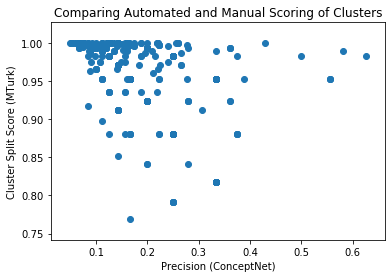

In [278]:
plt.scatter(merged["precision_cn"], merged["score"])
plt.xlabel("Precision (ConceptNet)")
plt.ylabel("Cluster Split Score (MTurk)")
plt.title("Comparing Automated and Manual Scoring of Clusters")
plt.savefig("auto_vs_manual.png")

In [226]:
aae_words = pd.read_csv("aae_words.csv")
aae_clusters = pd.read_csv("aae_clusters.csv")

In [246]:
aae_clusters

,Unnamed: 0,Unnamed: 0.1,precision_wn,recall_wn,precision_cn,recall_cn
0,0,0,1.0,0.333333,1.0,1.0
1,1,1,1.0,1.000000,1.0,1.0
2,2,2,1.0,0.066667,1.0,1.0
3,3,3,0.5,1.000000,0.5,1.0
4,4,4,1.0,0.058824,1.0,1.0
...,...,...,...,...,...,...
48595,895,895,1.0,1.000000,1.0,1.0
48596,896,896,1.0,1.000000,1.0,1.0
48597,897,897,1.0,1.000000,1.0,1.0
48598,898,898,1.0,1.000000,1.0,1.0


In [247]:
s = pd.read_csv("aae_words_glove_0.csv")

In [258]:
def create_missing_words_df(df):
	word_idx = []
	missing = []
	for word in df["Unnamed: 0"]:
		word_idx.append(word)
		missing_glove = int(word not in glove)
		try:
			missing_cn = int(len(cn_gold[word]) == 0)
		except:
			missing_cn = 1
		missing_wn = int(len(get_gold_wn(word)) == 1)
		
		missing.append({
			"missing_glove" : missing_glove,
			"missing_cn" : missing_cn,
			"missing_wn":  missing_wn
		})
		
	return pd.DataFrame(missing, index=word_idx)

In [260]:
words_dfs = []
for x in range(55):
    try:
        df = pd.read_csv("aae_words_glove_{}.csv".format(x))
        words_dfs.append(pd.merge(df, create_missing_words_df(df), left_on="Unnamed: 0", right_index=True))
        print(x, "works")
    except:
        print(x, "does not work")

0 works
1 works
2 works
3 does not work
4 works
5 works
6 works
7 works
8 works
9 works
10 works
11 works
12 works
13 works
14 works
15 works
16 works
17 works
18 works
19 works
20 works
21 works
22 works
23 works
24 works
25 works
26 works
27 works
28 works
29 works
30 does not work
31 works
32 works
33 works
34 works
35 works
36 works
37 works
38 works
39 works
40 works
41 works
42 works
43 works
44 works
45 works
46 works
47 works
48 works
49 works
50 works
51 works
52 works
53 works
54 does not work


In [261]:
words = pd.concat(words_dfs, axis=0)

In [277]:
for cols in ["precision_wn", "recall_wn", "precision_cn", "recall_cn"]:
    print(cols, aae_clusters[cols].mean(), aae_clusters[cols].std())

precision_wn 0.9332906623554773 0.17482531259058148
recall_wn 0.6873242184818064 0.38887953234266237
precision_cn 0.933162061532432 0.17500781543972221
recall_cn 1.0 0.0


In [264]:
words

,Unnamed: 0,precision_wn,recall_wn,precision_cn,recall_cn,missing_from_cn,missing_from_wn,missing_glove,missing_cn,missing_wn
0,tao,1.0,0.333333,1.0,1.0,1,0,0,1,0
1,cel,1.0,1.000000,1.0,1.0,1,1,0,1,1
2,mds,1.0,0.066667,1.0,1.0,1,0,0,1,0
3,ouf,0.5,1.000000,0.5,1.0,1,1,0,1,1
4,elle,0.5,1.000000,0.5,1.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1044,urinal,1.0,1.000000,1.0,1.0,1,1,0,1,1
1045,bogging,1.0,1.000000,1.0,1.0,1,1,0,1,1
1046,heatgang,1.0,1.000000,1.0,1.0,1,1,0,1,1
1047,sonnn,1.0,1.000000,1.0,1.0,1,1,0,1,1


In [285]:
words.sum()

Unnamed: 0         taocelmdsoufelleaccountyasmindeactivatedbebeli...
precision_wn                                                 46812.5
recall_wn                                                    36817.1
precision_cn                                                   46800
recall_cn                                                      53642
missing_from_cn                                                53642
missing_from_wn                                                32207
missing_glove                                                      0
missing_cn                                                     48456
missing_wn                                                     32207
dtype: object

In [273]:
brown.sents(categories=['fiction'])[10:20]

[['They',
  'ate',
  'the',
  'cafeteria',
  'food',
  'with',
  'its',
  'orange',
  'sauces',
  'and',
  'Scotty',
  'gazed',
  'without',
  'interest',
  'at',
  'his',
  'food',
  ',',
  'the',
  'teachers',
  ',',
  'the',
  'heroic',
  'baronial',
  'windows',
  ',',
  'and',
  'the',
  'bright',
  'ranks',
  'of',
  'college',
  'banners',
  '.'],
 ['His', 'father', 'tried', 'to', 'make', 'the', 'food', 'a', 'topic', '.'],
 ['``', 'The', 'blueberry', 'pie', 'is', 'good', ',', 'Scotty', '.'],
 ['I', 'recommend', 'it', "''", '.'],
 ['He', 'looked', 'at', 'his', 'son', ',', 'his', 'face', 'worried', '.'],
 ['Scotty',
  'murmured',
  ',',
  '``',
  'No',
  ',',
  'thanks',
  "''",
  ',',
  'so',
  'softly',
  'his',
  'father',
  'had',
  'to',
  'bend',
  'his',
  'gaunt',
  'height',
  'across',
  'the',
  'table',
  'and',
  'turn',
  'a',
  'round',
  'brown',
  'ear',
  'to',
  'him',
  '.'],
 ['Scotty',
  'regarded',
  'the',
  'ear',
  'and',
  'the',
  'grizzled',
  'hair',


In [276]:
" ".join(['``',
  "He's",
  'all',
  'right',
  ',',
  'Craig',
  "''",
  ',',
  'Rachel',
  'said',
  '.'])

"`` He's all right , Craig '' , Rachel said ."

In [284]:
gv_words

,Unnamed: 0,precision_wn,recall_wn,precision_cn,recall_cn,missing_from_cn,missing_from_wn
0,dms,0.333333,0.166667,0.333333,1.0,1,0
1,msgs,0.333333,0.333333,0.333333,1.0,1,0
2,msg,0.333333,0.333333,0.333333,1.0,1,0
3,porno,1.000000,0.200000,1.000000,1.0,1,0
4,fone,0.500000,1.000000,0.500000,1.0,1,1
...,...,...,...,...,...,...,...
22718,contender,0.500000,0.200000,0.500000,1.0,1,0
22719,nawll,1.000000,1.000000,1.000000,1.0,1,1
22720,holdon,1.000000,1.000000,1.000000,1.0,1,1
22721,byob,0.500000,1.000000,0.500000,1.0,1,1
